In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(20)
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


100%|██████████| 26.4M/26.4M [00:03<00:00, 8.28MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 136kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.61MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.8MB/s]


In [3]:
class cnn(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size = (3,3))
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 32, kernel_size = (3,3))
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, kernel_size = (3,3))
        self.bn3 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d((3,3))

        self.conv4 = nn.Conv2d(64, 70, kernel_size = (3,3))
        self.bn4 = nn.BatchNorm2d(70)
        self.pool2 = nn.MaxPool2d((3,3))

        self.flat = nn.Flatten()

        self.fc1 = nn.Linear(70,35)
        self.bn5 = nn.BatchNorm1d(35)

        self.fc2 = nn.Linear(35,10)

    def forward(self, X):

        out = self.bn1(self.conv1(X))
        out = F.relu(out)

        out = self.bn2(self.conv2(out))
        out = F.relu(out)

        out = self.bn3(self.conv3(out))
        out = F.relu(out)
        out = self.pool1(out)

        out = self.bn4(self.conv4(out))
        out = F.relu(out)
        out = self.pool2(out)

        out = self.flat(out)

        out = self.bn5(self.fc1(out))
        out = F.relu(out)

        return self.fc2(out)

model = cnn()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
n_epochs = 20
learning_rate = 0.0001

optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 0.0001)
loss = nn.CrossEntropyLoss()


For Epoch 1: Loss = 0.5052158924976985
For Epoch 2: Loss = 0.4626005635738373
For Epoch 3: Loss = 0.433892350435257
For Epoch 4: Loss = 0.41840724980831145
For Epoch 5: Loss = 0.4045738245288531
For Epoch 6: Loss = 0.3901072063644727
For Epoch 7: Loss = 0.3830936722278595
For Epoch 8: Loss = 0.37064435448646543
For Epoch 9: Loss = 0.3649332584778468
For Epoch 10: Loss = 0.36138493918180464
For Epoch 11: Loss = 0.3522260046084722
For Epoch 12: Loss = 0.34854836203257245
For Epoch 13: Loss = 0.33709607143004733
For Epoch 14: Loss = 0.3346401444753011
For Epoch 15: Loss = 0.3339119760990143
For Epoch 16: Loss = 0.3263752704222997
For Epoch 17: Loss = 0.3238425281027953
For Epoch 18: Loss = 0.32032931357820826
For Epoch 19: Loss = 0.3192443318625291
For Epoch 20: Loss = 0.3163131809393565


Text(0, 0.5, 'Loss')

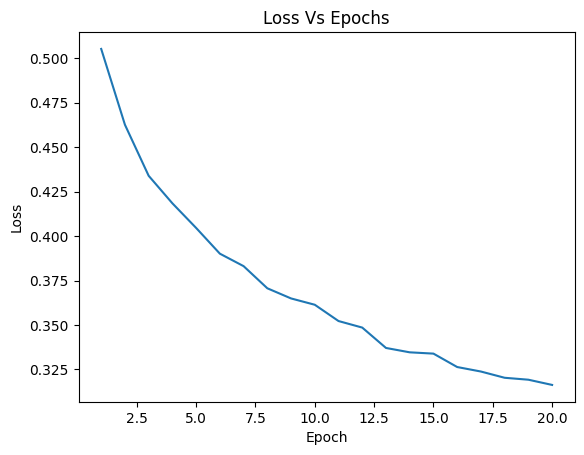

In [5]:
graph = {}

for epoch in range(n_epochs):
    total_loss = 0

    for batch_x, batch_y in trainloader:

        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()

        y_hat = model(batch_x)

        l = loss(y_hat, batch_y)

        l.backward()

        optimizer.step()

        total_loss += l.item() * batch_x.shape[0]

    avg_loss = total_loss / len(trainloader.dataset)

    print(f'For Epoch {epoch+1}: Loss = {avg_loss}')

    graph[epoch+1] = avg_loss

plt.plot(graph.keys(), graph.values())
plt.title('Loss Vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [7]:
#test set evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch_x, batch_y in testloader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        outputs = model(batch_x)

        _, predicted = torch.max(outputs, 1)

        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

accuracy = correct / total * 100
print(f'Test Set Accuracy: {accuracy:.2f}%')

Test Set Accuracy: 88.13%
